# MACHINE LEARNING.  PROYECTO TRADING

_Con el animo de aprender y fijar los conocimeintos de los cursos de ML qeu he realizado. Si no 'tocas' el codigo y solucionas pegas esto no se aprende._


https://www.novatostradingclub.com/formacion/como-saber-si-te-compensa-operar/
https://www.novatostradingclub.com/formacion/la-estrategia-cero/

https://www.quantinsti.com/blog/python-trading-library

In [1]:
import sklearn

In [2]:
import matplotlib.pyplot as plt
# import plotly   #pip install cufflinks plotly  USAR CONDA PARA INSTALAR

In [3]:
import numpy as np

In [4]:
import pandas as pd
from datetime import datetime, date, time, timedelta
import calendar

In [5]:
from pylab import *   #funciones interesantes para graficos y numpy ¿?

### 1.- Importar Base de Datos
_Leemos un excel con los datos de las cotizaciones, lo he sacado de Google Excel con Maros GoogleFinances
san2  grf  cellnex_  

In [6]:
datos = pd.read_csv("C:/Users/jjjimenez/Documents/data_j3/AI/DataSets/CoatizacionSAN/san2_2009_2019.csv",header=0, decimal=",",delimiter=";")

In [7]:
datos["DailyReturn"]=0.
datos["SMA"]=0.
datos["SlopeSMA"]=0.
datos["volumenNormalizado"]=0.
datos["MAX_min"]=0.     # -1 / 0 / +1

In [8]:
# print (datos["Date"])
# print (datos.iloc[20:32,0:4])  #sacar por filas

In [9]:
print(datos.info())   #Tenemos un array en Pandas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2521 entries, 0 to 2520
Data columns (total 12 columns):
Date                  2521 non-null object
Open                  2521 non-null float64
High                  2521 non-null float64
Low                   2521 non-null float64
Close                 2521 non-null float64
Volume                2521 non-null int64
Fecha Numerica        2521 non-null int64
DailyReturn           2521 non-null float64
SMA                   2521 non-null float64
SlopeSMA              2521 non-null float64
volumenNormalizado    2521 non-null float64
MAX_min               2521 non-null float64
dtypes: float64(9), int64(2), object(1)
memory usage: 236.4+ KB
None


In [10]:
#print(datos.loc[2:5])  # print (datos["Close"])

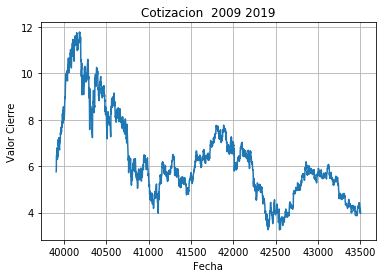

In [11]:
# Graficamos con nomencaltura PANDAS
fig, ax = plt.subplots()
ax.plot(datos.loc[:,"Fecha Numerica"], datos.loc[:,"Close"])

ax.set(xlabel='Fecha', ylabel='Valor Cierre',
       title='Cotizacion  2009 2019')
ax.grid()

#fig.savefig("test.png")
plt.show()

## .- Funciones en Jupyter
_Hacemos una funion que podemos llamar desde el notebook_

__Convertir "date" en integer para jugar mejor con los numeros__

<font color=red>  "11/02/2019"   es 737.101 en Python y 43.507 en excel FechaNumero  diferencia= 693594</font>

In [12]:
import time
import datetime 

today = date.today()
print(today)
print (date.toordinal(today))  #"11/02/2019"   es 737101 Python y 43507 en excel FechaNumero


2019-02-15
737105


In [13]:
aux=(date.toordinal(today))
print(aux)
aux=aux-693594
datos.loc[10,"Fecha Numerica"]=aux
print(datos.loc[10,"Fecha Numerica"])

737105
43511


In [14]:
#Funcion enviamos la fecha de excelNumerica y devuelve fecha 'normal'
def num2date(a):
    #recibimos el 43507
    b=a+693594
    return (date.fromordinal(b))
    return a+b

print(num2date(43507))

2019-02-11


# NumPY

_Para hacer calculos matemaitos y estadistico mejor pasar a numpy. 
En numpy no se referncian los arrays por nomre de filas/columna, tal y como se hace en Pandas
El la columna 7 guardo el dailyReturn, que es lo que ha variado en % la accion con relacion al cierre de ayer.
npDatos.shape[0] devuelve numero de filas_

In [15]:
npDatos = np.array(datos)
numeroFilas =npDatos.shape[0]   #numero de filas del numpy array, shape[1] numero de columnas

y = np.arange(numeroFilas)
npLabels=y.reshape(-1,1)
print(npLabels)

[[   0]
 [   1]
 [   2]
 ...
 [2518]
 [2519]
 [2520]]


In [16]:
#print (npDatos[2517,0:11])  #imprimir una columna en numpy

## .- Calculamos el DailyReturn

Numero de filas --> 2521


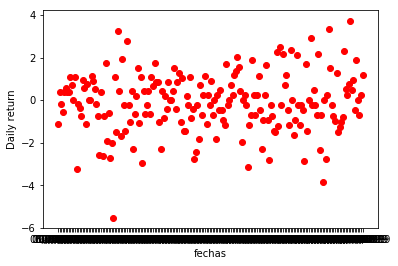

In [17]:

for n in range (1,numeroFilas):  #empiezo en uno para restar con el cero  
    # 1.- Hacemos la resta del valor de hoy y el de ayer
    npDatos[n:,7:8]= ((npDatos[n:,4:5])) 
    auxHoy= ((npDatos[n,4]))
    #2.- Calculamos el porcentage respecot ayer  ( 100* (valorHoy - valorAyer) / valorAyer)
    npDatos[n,7]=  100 * ((npDatos[n,4])-(npDatos[n-1,4])) /(npDatos[n-1,4])
    #print (npDatos[n,7])
#print (npDatos[0:10,7])  #imprimir una columna en numpy

print("Numero de filas -->", npDatos.shape[0])  # numero de filas que tenemos == numero de datos
#Plotear:
plt.scatter(npDatos[2300:2500,0], npDatos[2300:2500,7],c='red')
plt.xlabel("fechas")
plt.ylabel("Daily return")
plt.show()

## .- Trabajamos con el volumen

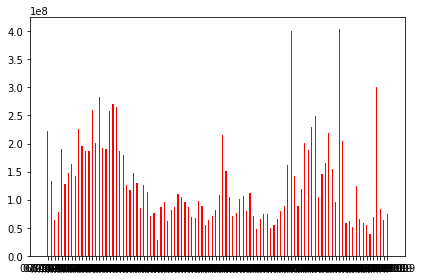

[221663040 133665120 64299368 78045648 190894864 127467600 148189056
 164316912 141962384 226606320]


In [18]:
fig, ax = plt.subplots()
rects1 = ax.bar(npDatos[0:100,0], npDatos[0:100,5], 0.35,
                color='red')
fig.tight_layout()
plt.show()
print(npDatos[0:10,5])

__Vamos a reescalar el valor del volumen para que no 'pese' demasiado respecto las otras features
normalizamos entre [0,1]__

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
numeroDatos = numeroFilas
print(numeroDatos)

Y = npDatos[0:numeroDatos,5].copy()
Y1= np.reshape(Y, (numeroDatos,-1))              # reshape para hacer el scaler por columna, por filas no funciona
#print(Y1)
scaler.fit(Y1)   # 
#print(scaler.data_max_)
#print(scaler.data_min_)

volumenWeighted=scaler.transform(Y1)
npDatos[0:numeroDatos,10]=volumenWeighted[0:numeroDatos,0]

#print(volumenWeighted)

2521


C:\Users\jjjimenez\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


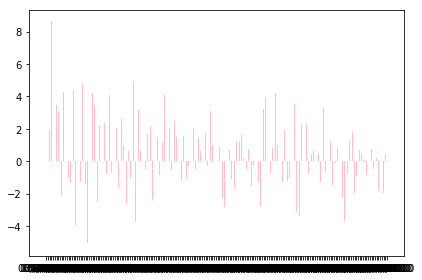

In [22]:
fig, ax = plt.subplots()
rects1 = ax.bar(npDatos[0:200,0], npDatos[0:200,7], 0.35,  color='pink')
fig.tight_layout()
plt.show()

## .- Media Ultimas sesiones (SMA)

### Media Movil Simple.
_(Periodo 1 + periodo 2 + periodo 3 + periodo 4) / 4 = X_

In [23]:
periodo =150               # Periodo para el que calculamos la Media.
totalSesiones=numeroFilas-periodo
aux=0

for y in range(totalSesiones):
    for x in range(periodo):    # Calculo para 150 sesiones.
                #print ( "valor =" ,npDatos[(y+periodo-x),4])
                #print ( "suma= ", aux)
        aux = aux + npDatos[(y+periodo-x),4]
    aux = aux/periodo
                #print(aux)  
    npDatos[(y+periodo),8]=aux
    
# Ojo: Para las primeras sesiones no puedo calcular la Media...
    

In [24]:
#print (npDatos[120:200,6:10])

## .- Pendiente de la tendencia

_Calculo la pendiente de la Media SMA de 150 sesiones para cada punto_

In [25]:
## Calulamos la pendiente   m= IncrementoY / incrementoX
slopeRange = 4
# cojo un rango de slopeSesion para calcualr la pendiente  
aux=0
for y in range(periodo+5, numeroDatos):    
    aux = 100* (npDatos[y,8]  -  npDatos[(y-slopeRange),8])/(slopeRange)
    npDatos[y,9]=aux
    print(aux)

3.3609872315899736
3.262406581543864
3.2667493772103207
3.3167783291814246
3.3587785221945943
3.3557251901480623
3.3557048346010365
3.3440380322307117
3.2989602535482554
3.355326401690295
3.2840355093446405
3.15689357006228
3.0493792904670247
2.9319958619363984
2.93787997241286
3.001252533149401
3.031675016887636
3.0385445001126055
3.0252569633340443
2.9718350464222443
2.9331455669761475
2.894554303779806
2.859297028691854
2.7973953135245644
2.7736493020900976
2.7451576620139306
2.6983010510800653
2.7146553403404994
2.691431035602232
2.656276206903918
2.687708508045983
2.697918056720283
2.642986120378099
2.6492865741358784
2.6859952438275325
2.726239968292088
2.7981749331218886
2.853654499554059
2.835691029997056
2.738904606866699
2.6482593640457797
2.5359883957603024
2.438573255971699
2.411257155039781
2.4610750477002785
2.4097405003179695
2.217731603335382
2.0697848773555183
1.867131899182306
1.7307808793278756
1.6398718725288308
1.4625991458168563
1.2947506609720882
1.17529833773977

0.6624253351922071
0.6910828355679577
0.729607218903805
0.7948640481260094
0.8586324269875156
0.9023908828465821
0.9393492725522812
0.91792899515033
0.8594528599676687
0.8040630190664144
0.7303604201271074
0.6732024028008654
0.767821349352027
0.9034521423290309
1.064356347615525
1.2237623756507832
1.2681584158376502
1.2417877227722363
1.1832785848184812
1.1728885238987852
1.1778192568259849
1.2261854617121815
1.2331745697447216
1.1882211637982643
1.0695881410919927
0.9721305876073005
0.893147537250738
0.8559543169150308
0.8773730287794379
0.8925158201918082
0.9209501054679325
0.9144730007031088
0.9010964866713378
0.8860073099111521
0.8792400487327212
0.8741949336582344
0.8824946328910732
0.8592166308859728
0.8740614442059425
0.9658270762946675
1.0297721805086146
1.1068651478700398
1.1307124343191255
1.08253808289549
1.048883587219307
1.0353258905814622
1.0435688392705256
1.060290458928459
1.0587352697261743
1.0537249017981365
1.1003581660119943
1.1523357211067564
1.23101557147407
1.293

## .- REPASAMOS TODOS LOS DATOS DEL TENSOR

In [26]:
print (npDatos[1000:2000,6:11])

[[41338 1.9434628975264916 5.837059273625501 0.603760751993776
  0.05517564082894014]
 [41339 -1.386481802426329 5.842313728490839 0.5956917383466376
  0.09552495675729877]
 [41340 0.17574692442881873 5.846348758189942 0.5673046115890035
  0.06353435304497247]
 ...
 [42761 -0.18939393939395216 4.2056884437663955 1.2237623756507832
  0.19898612228958862]
 [42762 0.0 4.218437922958442 1.2681584158376502 0.08351865769256715]
 [42765 -2.8462998102466694 4.229656252819722 1.2417877227722363
  0.11011445750603491]]


## .- Tenemos que hacer el array de labels.
_ Qué resultado queremos:
Vamos a calcular si en los proximos 30 dias encontramos llegamos a un valor que nos dé un benefico por accion__



In [27]:
#numeroFilas
#npLabels

# Una primera aproximacion al problema, ver si la accion sube un 4% en los proximas 20 sesiones.
# Con esto aprendemos el el metodo, luego pefeccionamos.
sesionesEspera=40

for x in range(numeroFilas-sesionesEspera):
    for y in range(sesionesEspera):
        PrecioCompra = npDatos[x,4]
        PrecioFuturo = npDatos[x+y,4]
        if(PrecioFuturo > 1.08 * PrecioCompra):
            npLabels[x]=1
        else:
            npLabels[x]=0

for x in range(numeroFilas-sesionesEspera, numeroFilas): #RElleno a ceros los ultimos 20 valores
    npLabels[x]=0
#npLabels.reshape(1,-1)
print(npLabels)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [28]:
#print (npLabels[numeroFilas-1000:numeroFilas,0])

## <font color=red>Hasta aquí tenemos todos los datos preparados. Un tensor con los datos por sesion. Ahora empieza en MachineLearning </font>

__El cuerpo me pide hacer algo con los maximos y minimos... pero tengo el problema de que no se reflehan los historicos en cada punto (esto seguro que se hace de alguna manera, a mi solo se me ocurre calcular más datos que me "traigan" el historico al presente)__

__Empezamos con un arbol de decición__

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
#Quita la columna de las fechas en string.
for x in range(numeroFilas):
    npDatos[x,0]=0
    
#Partimos los datos en training y test
X_train, X_test, y_train, y_test = train_test_split(npDatos, npLabels, test_size=0.4, random_state=0)

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

#clf = clf.fit(X, Y)

In [31]:
X_train.shape, y_train.shape

((1512, 12), (1512, 1))

In [32]:
X_test.shape, y_test.shape

((1009, 12), (1009, 1))

In [33]:
clf.score(X_test, y_test)

0.9167492566897919

In [34]:
#Numero de inversiones recomendadas
contador=0
for x in range(npDatos.shape[0]):  #numeroFilas =npDatos.shape[0] 
    if (npLabels[x]==1):
        contador+=1
print("Operaciones Call: " , contador)
print("Total operaciones: ", npDatos.shape[0])
print("Porcentages:", 100*contador/npDatos.shape[0])


Operaciones Call:  556
Total operaciones:  2521
Porcentages: 22.054740182467274


__Data columns (total 11 columns):__

Date                  2519 non-null object

Open                  2519 non-null float64

High                  2519 non-null float64

Low                   2519 non-null float64

Close                 2519 non-null float64

Volume                2519 non-null int64

Fecha Numerica        2519 non-null int64

DailyReturn           2519 non-null float64

SMA                   2519 non-null float64

SlopeSMA              2519 non-null float64

volumenNormalizado    2519 non-null float64_

In [35]:
#print (npDatos[2510,0:11])  #imprimir una columna en numpy

In [36]:
#print (npDatos[2510,0:11])  #imprimir una columna en numpy

In [37]:
clf.predict([[0, 5.0, 5.08, 4.97, 5.06, 86772105, 42748, 1.6064257028112285, 4.121477894249686,
 0.9393492725522812, 0.089643394505424, 0]])

array([1])

In [38]:
clf.predict([[0, 4.38, 4.42, 4.35, 4.42, 95336328, 43490, 1.8433179723502322, 4.31282827204024,
 -0.18857220193182478, 0.09929834213330786, 0]])

array([0])

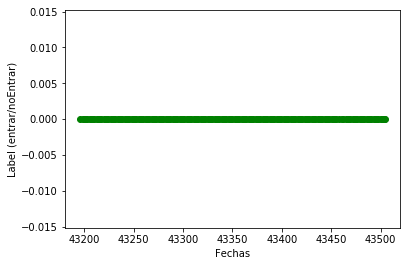

From 2018-04-06
To   2019-01-22
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [39]:
#Ploteamos
fechaInicio= 2300
fechaFin =   2517
plt.scatter(npDatos[fechaInicio:fechaFin,6], npLabels[fechaInicio:fechaFin, 0],c='green')
plt.xlabel("Fechas")
plt.ylabel("Label (entrar/noEntrar)")
plt.show()

print("From",num2date(npDatos[fechaInicio,6]) ) 
print("To  ",num2date(npDatos[fechaFin,6]))

print(npLabels[fechaInicio:fechaFin,0])

In [40]:
import plotly 
plotly.tools.set_credentials_file(username='j3viton', api_key='5jFoHJvH4h6lrqv3AXzG')

 Plotly
##5jFoHJvH4h6lrqv3AXzG
##j3viton


# 1.- Ingenieria de Datos
_Vamos a calcular los max min relativos_  

In [60]:
#Maxi si es mayor que las dos de al lado. Minimo si es menor
contador=0
numeroFilas 
distancia =2
for x in range(2, ((-2) + npDatos.shape[0])):  #numeroFilas =npDatos.shape[0] 
    if(npDatos[x,4:5]>npDatos[(x+distancia),4:5]  and
       npDatos[x,4:5]>npDatos[(x+distancia-1),4:5]  and
       npDatos[x,4:5]>npDatos[(x+distancia-1),4:5]  and
       npDatos[x,4:5]>npDatos[(x+distancia-1),4:5]  and
       npDatos[x,4:5]>npDatos[(x-distancia+1),4:5]  and
       npDatos[x,4:5]>npDatos[(x-distancia+1),4:5]  and
       npDatos[x,4:5]>npDatos[(x-distancia),4:5]  and
       npDatos[x,4:5]>npDatos[(x-distancia),4:5]  ):     #if (npLabels[x]==1)
        contador+=1
        npDatos[x,11:12]= npDatos[x,4:5]  #guardo el maximo en Positivo
    else:
        if(npDatos[x,4:5]<npDatos[(x+distancia),4:5]  and
           npDatos[x,4:5]<npDatos[(x+distancia-1),4:5]  and
           npDatos[x,4:5]<npDatos[(x+distancia-1),4:5]  and
           npDatos[x,4:5]<npDatos[(x+distancia-1),4:5]  and
           npDatos[x,4:5]<npDatos[(x-distancia+1),4:5]  and
           npDatos[x,4:5]<npDatos[(x-distancia+1),4:5]  and
           npDatos[x,4:5]<npDatos[(x-distancia),4:5]  and
           npDatos[x,4:5]<npDatos[(x-distancia),4:5]  ):     #if (npLabels[x]==1)
            contador+=1
            npDatos[x,11:12]= (-1)*npDatos[x,4:5]  #guardo el minimo en negativo
        else:
            npDatos[x,11:12]= 4
    

From 2018-08-27
To   2019-01-22


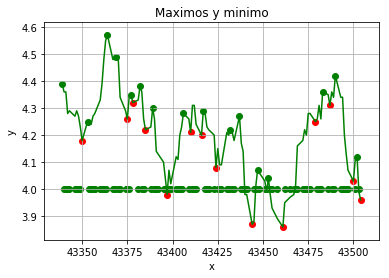

In [65]:



fechaInicio= 2400
fechaFin =   2517
#plt.scatter(npDatos[fechaInicio:fechaFin,6], npLabels[fechaInicio:fechaFin, 0],c='green')
#plt.xlabel("Fechas")
#plt.ylabel("Label (entrar/noEntrar)")
#plt.show()

print("From",num2date(npDatos[fechaInicio,6]) ) 
print("To  ",num2date(npDatos[fechaFin,6]))

fig, ax = plt.subplots()
ax.plot(npDatos[fechaInicio:fechaFin,6], npDatos[fechaInicio:fechaFin, 4],c='green')


for x in range(fechaInicio, fechaFin):
    if (0 > npDatos[x,11:12]):
        ax.scatter(npDatos[x,6], (-1)*npDatos[x, 11],c='red')

    if (0 < npDatos[x,11:12]):
        #ax.scatter(npDatos[fechaInicio:fechaFin,6], npDatos[fechaInicio:fechaFin, 11],c='green')
        ax.scatter(npDatos[x,6], npDatos[x, 11],c='green')
    
ax.set(xlabel='x', ylabel='y',
       title='Maximos y minimo')
ax.grid()

#fig.savefig("test.png")
plt.show()